Laboration 3 - Linjär klassificering

VG Del

Jag har på mitt förra program (G-nivå uppgift) undersökt data taget från dokumentet *unlabelled_data.csv* och sedan visualiserat och klassificerat punkterna tillsammans med en egen vald linjär funktion (y = -1.5 * x + 0.4). Jag tog därefter de klassificerade punkterna och la in som data i *labelled_data.csv*, nu uppdaterat med en "label" 0 eller 1 efter punkternas koordinater. Label 1 är **Grön** och label 0 är **Blå**.

Med grundkoden taget från mitt andra program *Laboration_3.py* har jag utökat denna för att även analysera nedstående punkter:

* f(x) = -0.489x
* g(x) = -2x + 0.16
* h(x) = 800x - 120



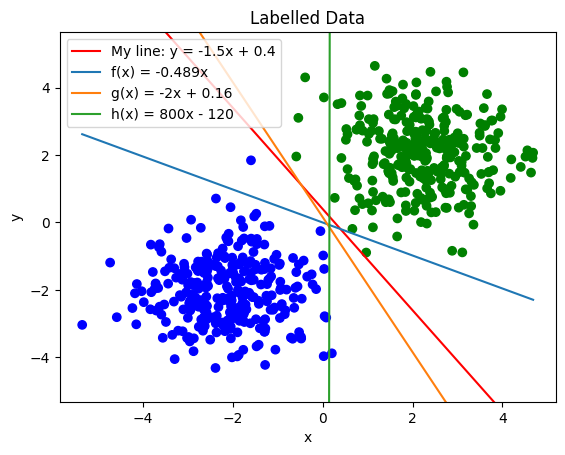

Differences in classification compared to my line:
f(x): 2 points
g(x): 0 points
h(x): 5 points

Total seperation count of blue and green points:
My line: 301 points are green, out of 600 points
f(x): 301 points are green, out of 600 points
g(x): 301 points are green, out of 600 points
h(x): 298 points are green, out of 600 points


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("unlabelled_data.csv", names = ["x", "y"])

x = data["x"].values
y = data["y"].values

def classify_point(y_actual, y_line, invert = False):
    if invert:
        return int(y_actual < y_line)
    else:
        return int(y_actual > y_line)

def my_line(x):
    return -1.5 * x + 0.4

def f(x):
    return -0.489 * x

def g(x):
    return -2 * x + 0.16

def h(x):
    return 800 * x - 120



data["label"] = [int(classify_point(y[i], my_line(x[i]))) for i in range(len(x))]

data["label_f"] = [int(classify_point(y[i], f(x[i]))) for i in range(len(x))]
data["label_g"] = [int(classify_point(y[i], g(x[i]))) for i in range(len(x))]
data["label_h"] = [int(classify_point(y[i], h(x[i]), invert = True)) for i in range(len(x))]

data.to_csv("labelled_data.csv", index = False, header = False)

colors = ["green" if c == 1 else "blue" for c in data["label"]]
x_vals = np.array([data["x"].min(), data["x"].max()])

plt.scatter(data["x"], data["y"], c = colors)
plt.plot(x_vals, my_line(x_vals), color="red", label=f"My line: y = -1.5x + 0.4")
plt.plot(x_vals, f(x_vals), label = "f(x) = -0.489x")
plt.plot(x_vals, g(x_vals), label = "g(x) = -2x + 0.16")
plt.plot(x_vals, h(x_vals), label = "h(x) = 800x - 120")
plt.ylim(data["y"].min() - 1, data["y"].max() + 1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Labelled Data")
plt.legend()
plt.show()

def plot_classification(func, label_column, label_name, color = "black"):
    colors = ["green" if c == 1 else "blue" for c in data[label_column]]
    plt.scatter(x, y, c = colors)
    plt.plot(x_vals, func(x_vals), color = color, label = label_name)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Classification using {label_name}")
    plt.ylim(data["y"].min() - 1, data["y"].max() + 1)
    plt.legend()
    plt.show()


print("Differences in classification compared to my line:")
print(f"f(x): {np.sum(data["label_f"] != data["label"])} points")
print(f"g(x): {np.sum(data["label_g"] != data["label"])} points")
print(f"h(x): {np.sum(data["label_h"] != data["label"])} points")

print("\nTotal seperation count of blue and green points:")
print(f"My line: {np.sum(data["label"])} points are green, out of 600 points")
print(f"f(x): {np.sum(data["label_f"])} points are green, out of 600 points")
print(f"g(x): {np.sum(data["label_g"])} points are green, out of 600 points")
print(f"h(x): {np.sum(data["label_h"])} points are green, out of 600 points")


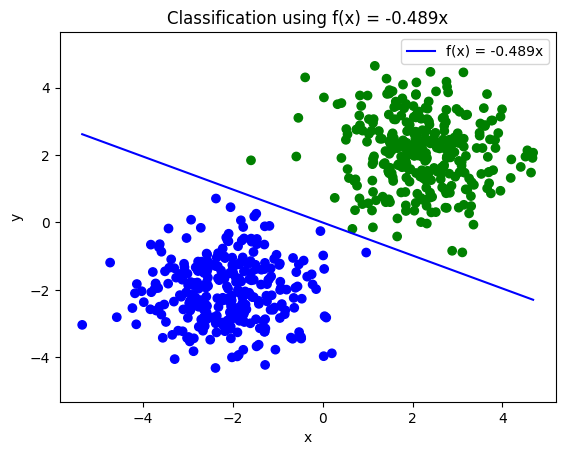

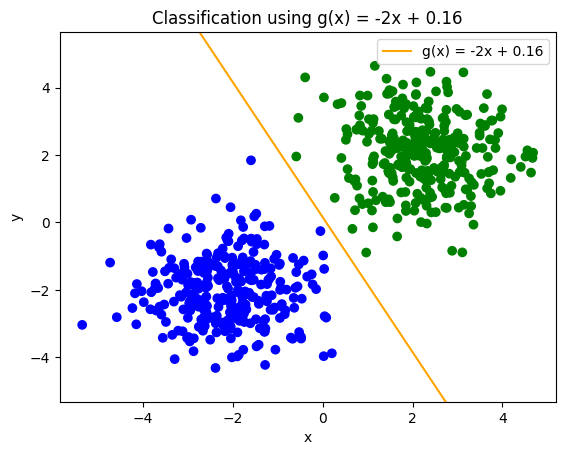

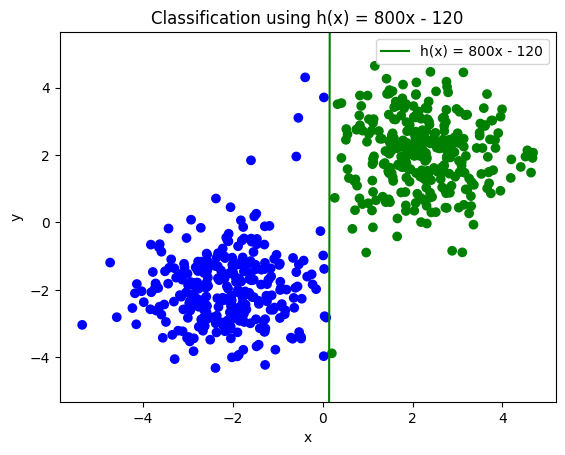

In [22]:
plot_classification(f, "label_f", "f(x) = -0.489x", color = "blue")
plot_classification(g, "label_g", "g(x) = -2x + 0.16", color = "orange")
plot_classification(h, "label_h", "h(x) = 800x - 120", color = "green")


Här jämför jag linjerna och hur de klassificerar punkterna i datan.

Man ser att både f(x) och g(x) delar punkterna på liknande sätt som min egen linje, men h(x) gav nästan motsatt klassificering, då linjen var så brant och därför får en positiv x-lutning. Jag fixade detta genom att invertera klassificeringen av h(x) så att det visuellt ser rätt ut.

Även med detta fixat så är h(x) den linjen som är mest olik de andra. Den klassficerar om 5 punkter jämfört med min linje medans andra endast klassifcerade om 0 eller 2 punkter.

Vilken linje är bäst då?

Man kan se det på lite olika sätt, man kan dela av punkterna 50/50 och därifrån räkna ut vilken som är närmast (i detta fall skulle en linje som ex. *-1.1x + 0.3* som separerar punkterna jämt men även ser visuellt okej ut)

Man kan snabbt se att linjer med positiv x-lutning (som ex. h(x)) inte alls kommer klassificera punkterna bra. Så det behöver vara en linje med negativ x-lutning, sedan finns det flera möjliga linjer med negativ x-lutning som hade fungerat bra.

Men egentligen är det bästa att själv visualisera punkterna och avgöra själv då de är ganska tydligt separerade i två grupper. Jag anser att min linje *-1.5x + 0.4* delar upp och klassificerar punkterna bäst visuellt. 

